<a href="https://colab.research.google.com/github/KManvitha26/PRODIGY_INFOTECH/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Implementing the dog vs cat dataset from kaggle

In [ ]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:05<00:00, 232MB/s]
100% 812M/812M [00:05<00:00, 154MB/s]


In [ ]:
!ls

cat.jpg  dog.jpg  dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile
data='/content/dogs-vs-cats.zip'
with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
from zipfile import ZipFile
data='/content/train.zip'
with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count=len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.11303.jpg', 'cat.7070.jpg', 'cat.5200.jpg', 'cat.6.jpg', 'cat.8124.jpg', 'cat.1579.jpg', 'dog.1925.jpg', 'cat.7670.jpg', 'cat.11009.jpg', 'dog.4301.jpg', 'cat.4619.jpg', 'dog.2696.jpg', 'dog.936.jpg', 'dog.5558.jpg', 'dog.852.jpg', 'cat.5453.jpg', 'dog.8306.jpg', 'dog.1837.jpg', 'dog.9511.jpg', 'cat.1470.jpg', 'dog.6043.jpg', 'dog.10298.jpg', 'dog.8072.jpg', 'dog.10693.jpg', 'cat.12200.jpg', 'cat.4085.jpg', 'cat.5885.jpg', 'dog.998.jpg', 'cat.10139.jpg', 'dog.10999.jpg', 'cat.9708.jpg', 'cat.505.jpg', 'cat.10167.jpg', 'dog.1292.jpg', 'cat.851.jpg', 'dog.87.jpg', 'dog.2149.jpg', 'dog.1190.jpg', 'dog.3933.jpg', 'cat.951.jpg', 'cat.11401.jpg', 'cat.10015.jpg', 'cat.2091.jpg', 'dog.7600.jpg', 'dog.9033.jpg', 'dog.3476.jpg', 'dog.5925.jpg', 'cat.9729.jpg', 'dog.7382.jpg', 'cat.2258.jpg', 'cat.5611.jpg', 'dog.3160.jpg', 'cat.10003.jpg', 'cat.7168.jpg', 'dog.2715.jpg', 'cat.10273.jpg', 'cat.11440.jpg', 'cat.6429.jpg', 'cat.4491.jpg', 'dog.8317.jpg', 'dog.9428.jpg', 'cat.1375.jpg', 'dog.

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

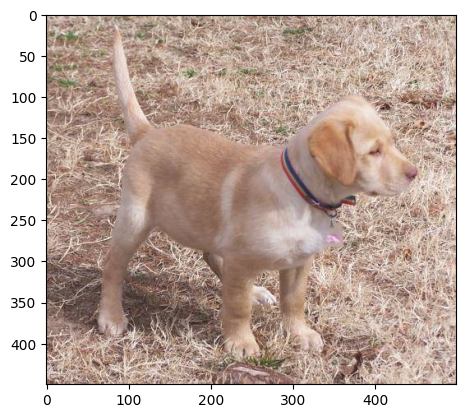

In [ ]:
#display dog image
img=mpimg.imread('/content/train/dog.11655.jpg')
imgplt=plt.imshow(img)
plt.show()

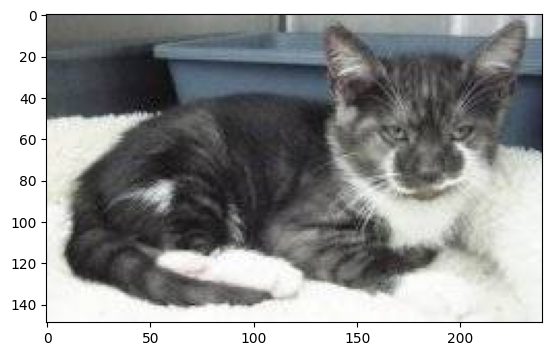

In [ ]:
#display cat image
img=mpimg.imread('/content/train/cat.5740.jpg')
imgplt=plt.imshow(img)
plt.show()

In [ ]:
file_names=os.listdir('/content/train')
for i in range(5):
  name=file_names[i]
  print(name[0:3])

cat
cat
cat
cat
cat


In [ ]:
file_names=os.listdir('/content/train')
dog_count=0
cat_count=0
for img_file in file_names:
  name=img_file[0:3]
  if name=='dog':
    dog_count+=1
  else:
    cat_count+=1
print('Number of dog images = ', dog_count)
print('Number of cat images = ', cat_count)

Number of dog images =  12500
Number of cat images =  12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized/')

In [ ]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  newImgPath=resized_folder+filename
  img.save(newImgPath)


Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [ ]:
# creating a for loop to assign labels
file_names=os.listdir('/content/image resized/')
labels=[]
for i in range(2000):
  file_name=file_names[i]
  label=file_name[0:3]
  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(file_names[0:5])
print(len(file_names))

['cat.11303.jpg', 'cat.7070.jpg', 'cat.5200.jpg', 'cat.6.jpg', 'cat.8124.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


In [ ]:
#counting the images of dogs and cats out of 2000 images
values, counts=np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 975 1025]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension=['png','jpg']

files=[]
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]
dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[177 180 178]
   [177 180 178]
   [185 188 186]
   ...
   [134 138 139]
   [156 160 161]
   [ 97 101 102]]

  [[179 182 180]
   [176 179 177]
   [182 185 183]
   ...
   [134 138 139]
   [155 159 160]
   [ 95  99 100]]

  [[182 185 183]
   [175 178 176]
   [177 180 178]
   ...
   [134 138 139]
   [153 157 158]
   [ 92  96  97]]

  ...

  [[ 85 112 132]
   [ 83 109 126]
   [ 84 108 126]
   ...
   [118 145 172]
   [111 138 164]
   [108 135 161]]

  [[ 83 110 130]
   [ 86 112 129]
   [ 86 110 128]
   ...
   [139 164 190]
   [129 154 180]
   [123 148 174]]

  [[ 79 106 126]
   [ 85 111 128]
   [ 86 110 128]
   ...
   [150 175 201]
   [141 164 190]
   [132 155 181]]]


 [[[ 66  98 127]
   [ 87 119 148]
   [121 156 182]
   ...
   [ 43  68  94]
   [ 40  67  94]
   [ 54  81 108]]

  [[ 66 100 129]
   [ 66 103 129]
   [ 83 120 146]
   ...
   [ 82 113 138]
   [ 83 114 139]
   [ 86 120 144]]

  [[ 51  92 117]
   [ 43  85 108]
   [ 42  86 109]
   ...
   [ 50  95 116]
   [ 60 105 126]
   [ 65 110

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X=dog_cat_images
Y=np.asarray(labels)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.94901961 0.00392157 0.        ]
   [0.94117647 0.         0.        ]
   [0.93333333 0.         0.        ]
   ...
   [0.69019608 0.01960784 0.02745098]
   [0.63137255 0.00784314 0.01568627]
   [0.6        0.         0.00392157]]

  [[0.94901961 0.00392157 0.        ]
   [0.94117647 0.         0.        ]
   [0.93333333 0.         0.        ]
   ...
   [0.63921569 0.00784314 0.01568627]
   [0.59215686 0.00392157 0.00392157]
   [0.56078431 0.         0.        ]]

  [[0.94509804 0.         0.00392157]
   [0.93333333 0.         0.        ]
   [0.9254902  0.         0.        ]
   ...
   [0.55686275 0.         0.00392157]
   [0.51372549 0.         0.        ]
   [0.48627451 0.         0.        ]]

  ...

  [[0.80784314 0.02352941 0.02745098]
   [0.76862745 0.01568627 0.01568627]
   [0.70980392 0.01176471 0.00784314]
   ...
   [0.41960784 0.00392157 0.        ]
   [0.41176471 0.00784314 0.        ]
   [0.41176471 0.00784314 0.        ]]

  [[0.73333333 0.01960784 0.01960784]
   [0.6

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model='https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/tf2-preview-feature-vector/versions/4'

In [ ]:
pretained_model=hub.KerasLayer(mobilenet_model, input_shape=(224, 224 , 3), trainable=False)

In [ ]:
num_of_classes =2
model=tf.keras.Sequential([
    pretained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 72s 1s/step - loss: 0.2782 - acc: 0.8769
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0850 - acc: 0.9725
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0644 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0507 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 66s 1s/step - loss: 0.0434 - acc: 0.9894


In [ ]:
score, acc=model.evaluate(X_test_scaled, Y_test)
print('Test Loss= ',score)
print('Test Accuarcy= ', acc)

13/13 [==============================] - 24s 2s/step - loss: 0.0892 - acc: 0.9725
Test Loss=  0.08917804062366486
Test Accuarcy=  0.9725000262260437


Predictive System

Path of the image to be predicted: /content/cat.jpg


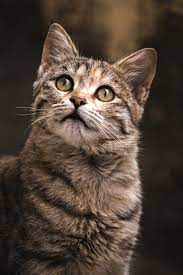

1/1 [==============================] - 1s 1s/step
[[ 2.7463849 -4.2359624]]
0
The image represents a cat


In [ ]:
input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image, (224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled, [1,224,224,3])
input_prediction=model.predict(image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label==0:
  print('The image represents a cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


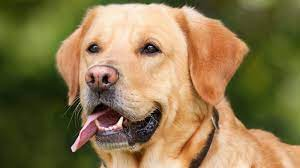

1/1 [==============================] - 0s 90ms/step
[[-3.9889233  4.5812755]]
1
The image represents a Dog


In [ ]:
input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image, (224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled, [1,224,224,3])
input_prediction=model.predict(image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label==0:
  print('The image represents a cat')
else:
  print('The image represents a Dog')
